# 🎯 **TENSORES VISUALES**: Geometría de la Anisotropía

---

## 🤔 **PREGUNTAS CENTRALES DEL NOTEBOOK 2**

### 🔍 *"¿Por qué la dispersión no es simétrica?"*
### 🔍 *"¿Qué significa exactamente esa matriz 3×3?"*

**Respuesta**: El **tensor de difusividad anisótropo** codifica cómo el medio (lecho del río) afecta diferentemente la dispersión según la dirección. ¡Vamos a visualizarlo!

---

## 🌊 **EL PROBLEMA FÍSICO: Lecho Estratificado del Amazonas**

### 🪨 **¿Por qué no es uniforme la dispersión?**

En un canal real del Amazonas:
- **Flujo longitudinal**: Rápido, turbulento → **Alta difusividad**
- **Flujo transversal**: Lento, obstáculos → **Baja difusividad**  
- **Lecho estratificado**: Arena, arcilla, roca → **Diferentes propiedades**
- **Acoplamiento cruzado**: Corrientes secundarias → **Difusión cruzada**

### 📐 **El Tensor de Difusividad:**
$$\mathbf{D} = \begin{pmatrix} D_{xx} & D_{xy} \\ D_{yx} & D_{yy} \end{pmatrix}$$

**NO es solo un número, ¡es una TRANSFORMACIÓN GEOMÉTRICA!**

---

## 🎓 **ESTRATEGIA REVERSE ENGINEERING**

### ✨ **Ruta de aprendizaje:**
1. **Visualizar primero**: Elipses de difusividad impactantes
2. **Deconstruir matemática**: Eigenvalores, eigenvectores, rotaciones
3. **Conectar con física**: ¿Por qué surge la anisotropía?
4. **Experimentar parámetros**: Efecto de diferentes tensores
5. **Aplicar al Amazonas**: Caso real con interpretación
6. **Preparar Notebook 4**: ¿Cómo se discretiza esto?

---

In [2]:
# 🎨 LABORATORIO VISUAL DE TENSORES - Herramientas de geometría avanzada
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyBboxPatch, Circle, Arrow
from matplotlib.collections import LineCollection
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.linalg import eig, inv, sqrtm
from scipy.integrate import odeint
import sympy as sp
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# Estilo tensorial profesional
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Paleta de colores tensoriales
TENSOR_COLORS = {
    'isotropic': '#2E8B57',      # Verde marino para isótropo
    'anisotropic': '#FF6347',    # Rojo tomate para anisótropo  
    'eigen1': '#4169E1',         # Azul real para eigenvalor 1
    'eigen2': '#32CD32',         # Verde lima para eigenvalor 2
    'coupling': '#FF1493',       # Rosa fuerte para acoplamiento
    'field_lines': '#8A2BE2',    # Azul violeta para líneas de campo
    'amazon': '#1E90FF'          # Azul dodger para Amazonas
}

print("🎨 LABORATORIO TENSORIAL ACTIVADO")
print("🔬 Objetivo: Visualizar la geometría de la anisotropía")
print("📐 Herramientas: Álgebra lineal + Visualización 3D")
print("🌊 Aplicación: Transporte anisótropo en el Amazonas")
print("\n🎯 Preguntas objetivo:")
print("   • ¿Por qué la dispersión no es simétrica?")
print("   • ¿Qué significa la matriz 3×3?")
print("   • ¿Cómo se ve geométricamente la anisotropía?")

🎨 LABORATORIO TENSORIAL ACTIVADO
🔬 Objetivo: Visualizar la geometría de la anisotropía
📐 Herramientas: Álgebra lineal + Visualización 3D
🌊 Aplicación: Transporte anisótropo en el Amazonas

🎯 Preguntas objetivo:
   • ¿Por qué la dispersión no es simétrica?
   • ¿Qué significa la matriz 3×3?
   • ¿Cómo se ve geométricamente la anisotropía?


## 🎭 **DEMOSTRACIÓN IMPACTANTE**: Comparación Isótropo vs Anisótropo

### 🌟 **Veamos primero el EFECTO, luego la matemática**

Imaginen dos gotas de contaminante idénticas:
- **Gota A**: En medio isótropo (dispersión igual en todas direcciones)
- **Gota B**: En medio anisótropo (dispersión preferencial)

### 🎪 **¡El espectáculo tensorial comienza!**

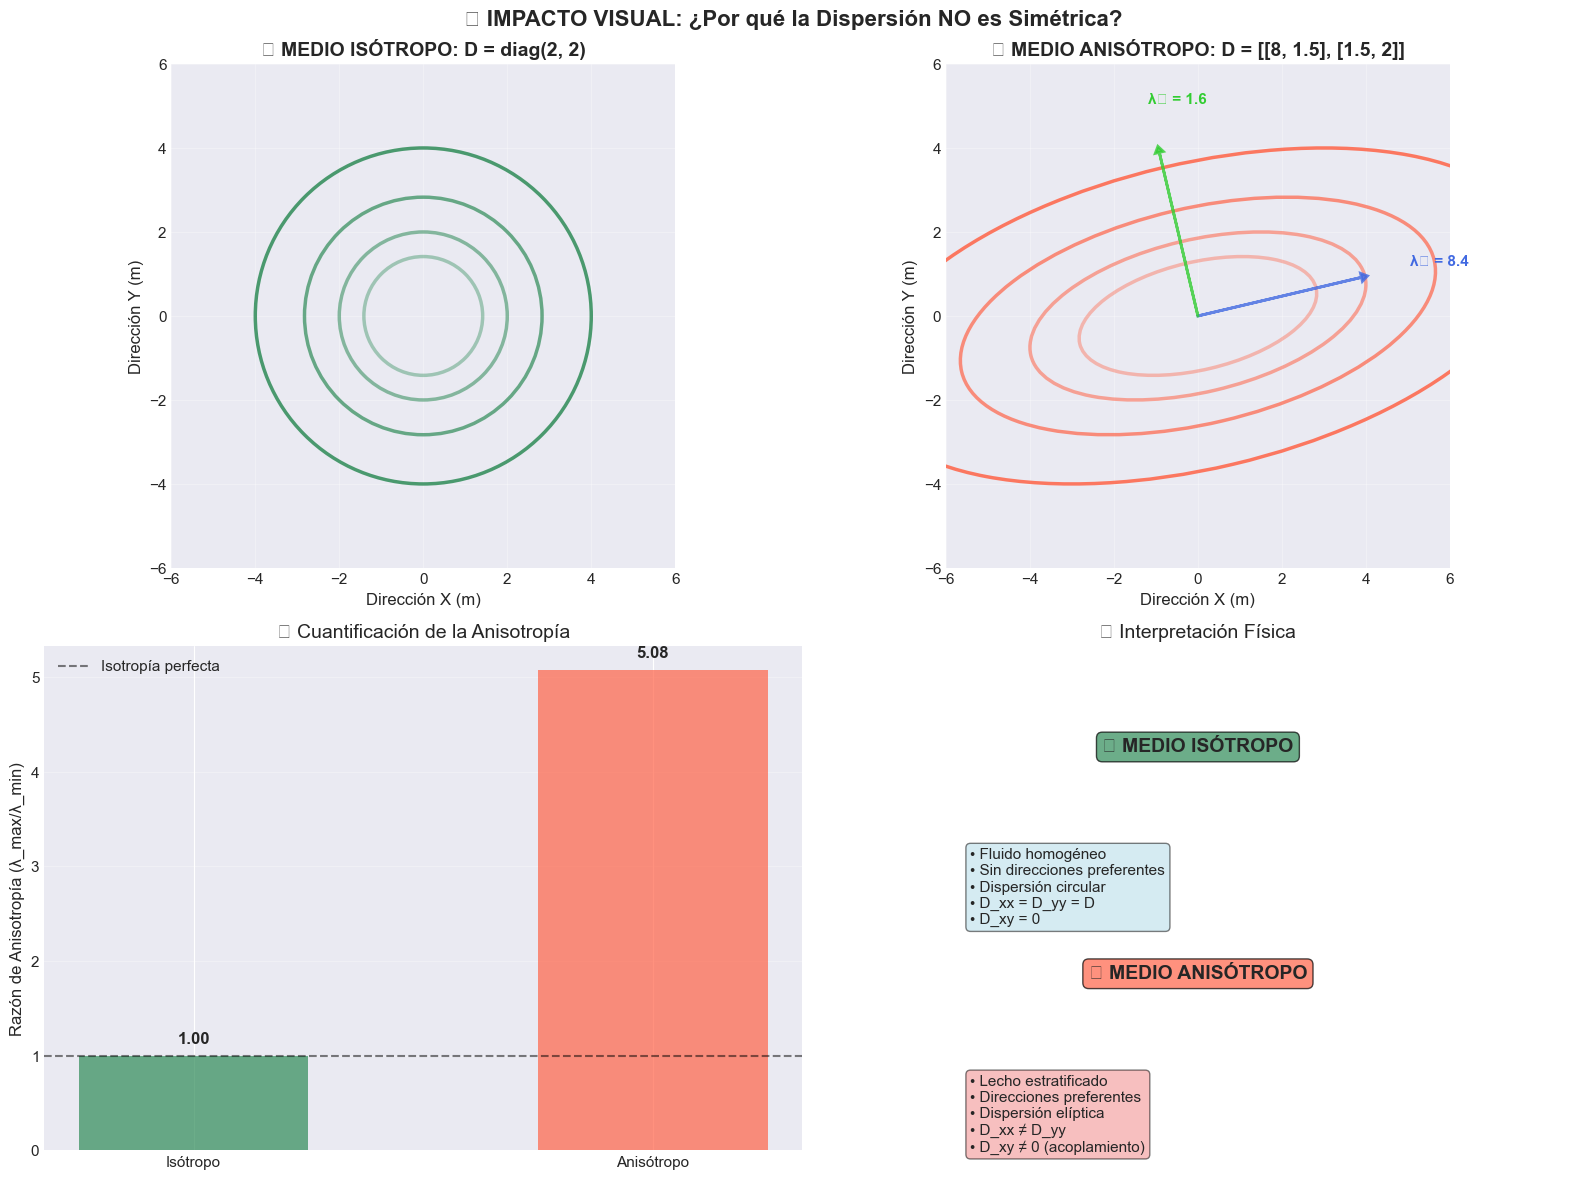

💡 PRIMERA REVELACIÓN:
   • Isótropo: Círculos perfectos (ratio = 1.0)
   • Anisótropo: Elipses orientadas (ratio = 5.1)
   • ¡La anisotropía = 5.1x más dispersión en una dirección!

🤔 NUEVA PREGUNTA: ¿Cómo se calcula esa elipse matemáticamente?


In [4]:
# 🎭 DEMOSTRACIÓN IMPACTANTE: Isótropo vs Anisótropo

def create_impact_demo():
    """Demostración visual del impacto de la anisotropía"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Configuración temporal
    times = [0.5, 1.0, 2.0, 4.0]
    
    # Caso 1: Tensor ISÓTROPO
    D_iso = np.array([[2.0, 0.0], [0.0, 2.0]])  # Difusión igual en X e Y
    
    # Caso 2: Tensor ANISÓTROPO
    D_aniso = np.array([[8.0, 1.5], [1.5, 2.0]])  # Difusión preferencial + acoplamiento
    
    # Panel 1: Evolución isótropa
    for i, t in enumerate(times):
        # Elipse de dispersión (proporcional a √(2Dt))
        eigenvals_iso, eigenvecs_iso = np.linalg.eig(D_iso)
        
        # Radios de la elipse
        a_iso = np.sqrt(2 * eigenvals_iso[0] * t)
        b_iso = np.sqrt(2 * eigenvals_iso[1] * t)
        
        ellipse_iso = Ellipse((0, 0), 2*a_iso, 2*b_iso, 
                             angle=0, linewidth=2.5, 
                             fill=False, color=TENSOR_COLORS['isotropic'],
                             alpha=0.4 + 0.6*i/len(times),
                             label=f't = {t}' if i == len(times)-1 else '')
        ax1.add_patch(ellipse_iso)
    
    ax1.set_xlim(-6, 6)
    ax1.set_ylim(-6, 6)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('🔵 MEDIO ISÓTROPO: D = diag(2, 2)', fontweight='bold')
    ax1.set_xlabel('Dirección X (m)')
    ax1.set_ylabel('Dirección Y (m)')
    
    # Panel 2: Evolución anisótropa
    eigenvals_aniso, eigenvecs_aniso = np.linalg.eig(D_aniso)
    
    # Ángulo de rotación
    angle_aniso = np.degrees(np.arctan2(eigenvecs_aniso[1, 0], eigenvecs_aniso[0, 0]))
    
    for i, t in enumerate(times):
        # Radios según eigenvalores
        a_aniso = np.sqrt(2 * eigenvals_aniso[0] * t)
        b_aniso = np.sqrt(2 * eigenvals_aniso[1] * t)
        
        ellipse_aniso = Ellipse((0, 0), 2*a_aniso, 2*b_aniso, 
                               angle=angle_aniso, linewidth=2.5, 
                               fill=False, color=TENSOR_COLORS['anisotropic'],
                               alpha=0.4 + 0.6*i/len(times),
                               label=f't = {t}' if i == len(times)-1 else '')
        ax2.add_patch(ellipse_aniso)
    
    # Mostrar ejes principales
    scale = 4
    ax2.arrow(0, 0, eigenvecs_aniso[0, 0]*scale, eigenvecs_aniso[1, 0]*scale,
             head_width=0.2, head_length=0.15, fc=TENSOR_COLORS['eigen1'], 
             ec=TENSOR_COLORS['eigen1'], linewidth=2, alpha=0.8)
    ax2.arrow(0, 0, eigenvecs_aniso[0, 1]*scale, eigenvecs_aniso[1, 1]*scale,
             head_width=0.2, head_length=0.15, fc=TENSOR_COLORS['eigen2'], 
             ec=TENSOR_COLORS['eigen2'], linewidth=2, alpha=0.8)
    
    ax2.text(eigenvecs_aniso[0, 0]*scale*1.3, eigenvecs_aniso[1, 0]*scale*1.3,
            f'λ₁ = {eigenvals_aniso[0]:.1f}', fontsize=11, fontweight='bold',
            color=TENSOR_COLORS['eigen1'])
    ax2.text(eigenvecs_aniso[0, 1]*scale*1.3, eigenvecs_aniso[1, 1]*scale*1.3,
            f'λ₂ = {eigenvals_aniso[1]:.1f}', fontsize=11, fontweight='bold',
            color=TENSOR_COLORS['eigen2'])
    
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(-6, 6)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('🔴 MEDIO ANISÓTROPO: D = [[8, 1.5], [1.5, 2]]', fontweight='bold')
    ax2.set_xlabel('Dirección X (m)')
    ax2.set_ylabel('Dirección Y (m)')
    
    # Panel 3: Comparación de razones de anisotropía
    ratio_iso = max(eigenvals_iso) / min(eigenvals_iso)
    ratio_aniso = max(eigenvals_aniso) / min(eigenvals_aniso)
    
    ratios = [ratio_iso, ratio_aniso]
    labels = ['Isótropo', 'Anisótropo']
    colors = [TENSOR_COLORS['isotropic'], TENSOR_COLORS['anisotropic']]
    
    bars = ax3.bar(labels, ratios, color=colors, alpha=0.7, width=0.5)
    
    # Añadir valores en las barras
    for bar, ratio in zip(bars, ratios):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{ratio:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    ax3.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='Isotropía perfecta')
    ax3.set_ylabel('Razón de Anisotropía (λ_max/λ_min)')
    ax3.set_title('📊 Cuantificación de la Anisotropía')
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.legend()
    
    # Panel 4: Interpretación física
    ax4.text(0.5, 0.8, '🌊 MEDIO ISÓTROPO', ha='center', va='center',
            transform=ax4.transAxes, fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor=TENSOR_COLORS['isotropic'], alpha=0.7))
    
    ax4.text(0.2, 0.6, '• Fluido homogéneo\n• Sin direcciones preferentes\n• Dispersión circular\n• D_xx = D_yy = D\n• D_xy = 0',
            transform=ax4.transAxes, fontsize=11, va='top',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    ax4.text(0.5, 0.35, '🌊 MEDIO ANISÓTROPO', ha='center', va='center',
            transform=ax4.transAxes, fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor=TENSOR_COLORS['anisotropic'], alpha=0.7))
    
    ax4.text(0.2, 0.15, '• Lecho estratificado\n• Direcciones preferentes\n• Dispersión elíptica\n• D_xx ≠ D_yy\n• D_xy ≠ 0 (acoplamiento)',
            transform=ax4.transAxes, fontsize=11, va='top',
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('🔬 Interpretación Física')
    
    plt.suptitle('🎭 IMPACTO VISUAL: ¿Por qué la Dispersión NO es Simétrica?', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("💡 PRIMERA REVELACIÓN:")
    print(f"   • Isótropo: Círculos perfectos (ratio = {ratio_iso:.1f})")
    print(f"   • Anisótropo: Elipses orientadas (ratio = {ratio_aniso:.1f})")
    print(f"   • ¡La anisotropía = {ratio_aniso:.1f}x más dispersión en una dirección!")
    print(f"\n🤔 NUEVA PREGUNTA: ¿Cómo se calcula esa elipse matemáticamente?")

create_impact_demo()

## 🧮 **DECONSTRUCCIÓN MATEMÁTICA**: El Álgebra Lineal Detrás de las Elipses

### 📐 **¿Cómo se construye una elipse de difusividad?**

La respuesta está en el **análisis espectral** del tensor:

$$\mathbf{D} = \mathbf{P} \mathbf{\Lambda} \mathbf{P}^T$$

Donde:
- **$\mathbf{\Lambda}$**: Matriz diagonal de eigenvalores → **Radios principales**
- **$\mathbf{P}$**: Matriz de eigenvectores → **Orientación de la elipse**

### 🎯 **¡Vamos a deconstruir esta magia paso a paso!**

🔍 ANÁLISIS ESPECTRAL DEL TENSOR AMAZONAS:
   D = [[25.0, 4.0], [4.0, 3.0]]
   λ₁ = 25.70 m²/s (dirección principal)
   λ₂ = 2.30 m²/s (dirección secundaria)
   Razón de anisotropía = 11.20


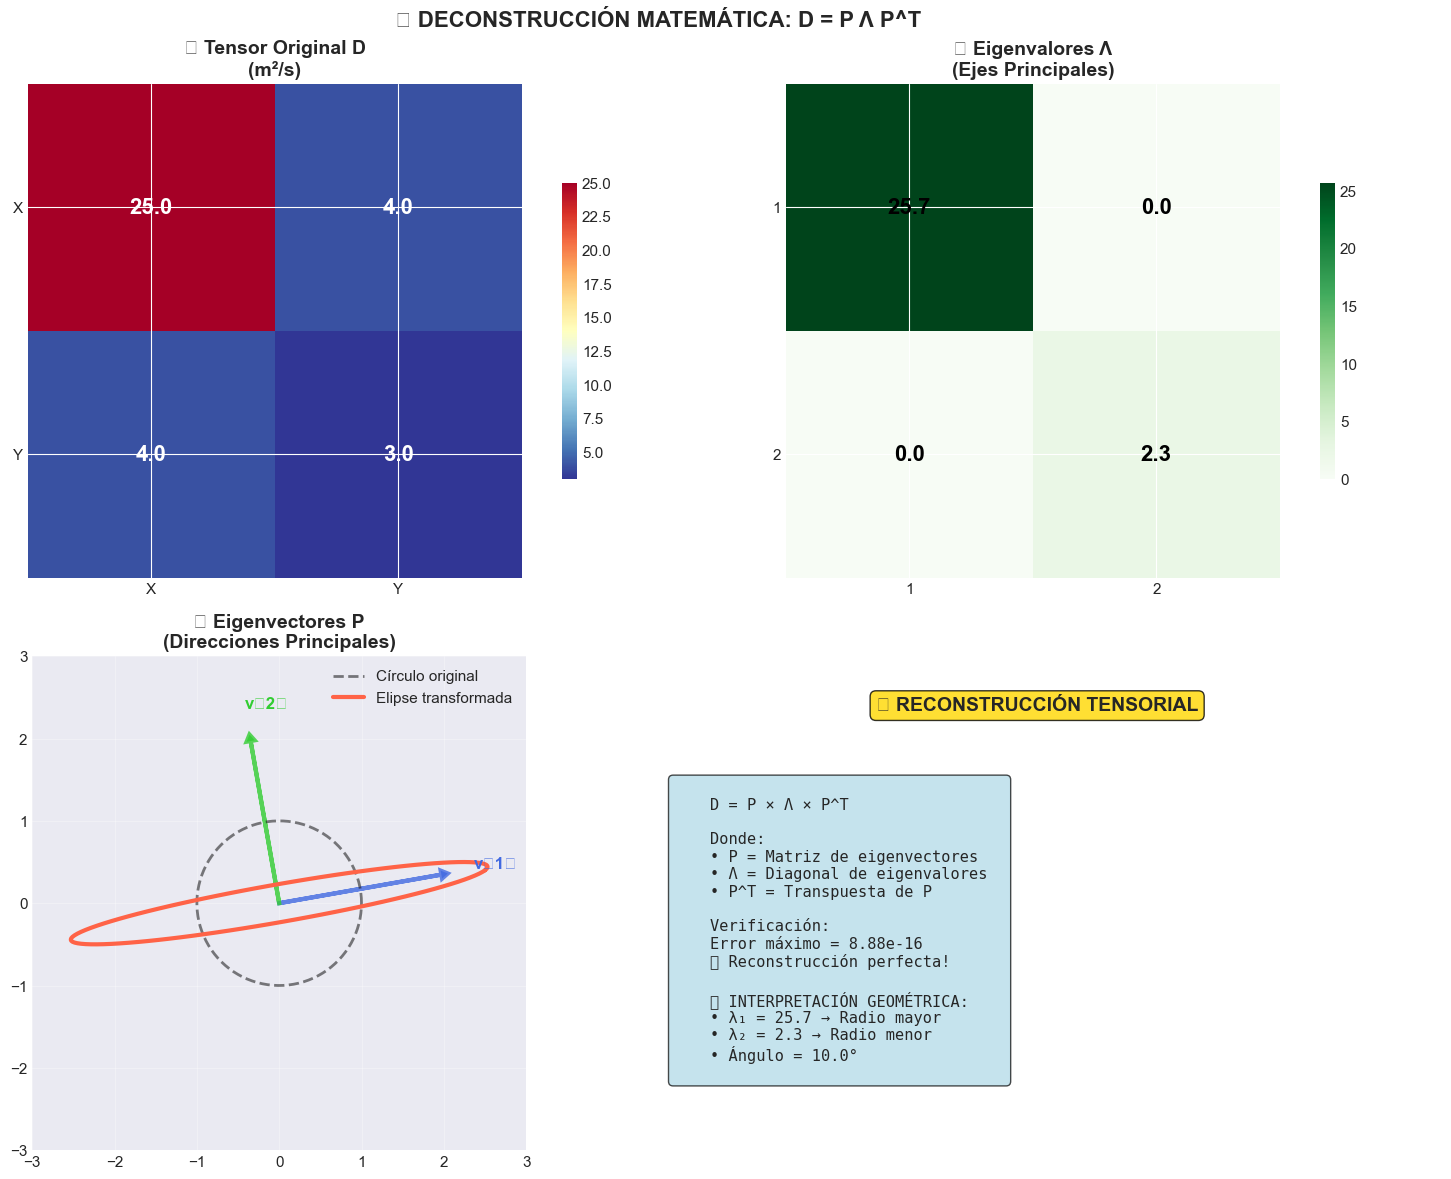


🎉 SEGUNDA REVELACIÓN:
   • El tensor D contiene TODA la información geométrica
   • Los eigenvalores determinan los RADIOS de la elipse
   • Los eigenvectores determinan la ORIENTACIÓN
   • ¡Un tensor 2×2 = Una elipse completamente especificada!

🤔 NUEVA PREGUNTA: ¿Por qué surge esta anisotropía en la naturaleza?


In [6]:
# 🧮 DECONSTRUCCIÓN MATEMÁTICA: Eigenanálisis paso a paso

def tensor_decomposition_demo():
    """Deconstruye matemáticamente el tensor de difusividad"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Tensor anisótropo del Amazonas
    D_amazon = np.array([[25.0, 4.0], [4.0, 3.0]])
    
    # PASO 1: Eigenanálisis
    eigenvals, eigenvecs = np.linalg.eig(D_amazon)
    
    # Ordenar eigenvalores (mayor primero)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    print("🔍 ANÁLISIS ESPECTRAL DEL TENSOR AMAZONAS:")
    print(f"   D = [[{D_amazon[0,0]:.1f}, {D_amazon[0,1]:.1f}], [{D_amazon[1,0]:.1f}, {D_amazon[1,1]:.1f}]]")
    print(f"   λ₁ = {eigenvals[0]:.2f} m²/s (dirección principal)")
    print(f"   λ₂ = {eigenvals[1]:.2f} m²/s (dirección secundaria)")
    print(f"   Razón de anisotropía = {eigenvals[0]/eigenvals[1]:.2f}")
    
    # Panel 1: Tensor original como heatmap
    im1 = ax1.imshow(D_amazon, cmap='RdYlBu_r', aspect='equal')
    
    # Añadir valores del tensor
    for i in range(2):
        for j in range(2):
            ax1.text(j, i, f'{D_amazon[i,j]:.1f}', ha='center', va='center',
                    fontsize=16, fontweight='bold', color='white')
    
    ax1.set_xticks([0, 1])
    ax1.set_yticks([0, 1])
    ax1.set_xticklabels(['X', 'Y'])
    ax1.set_yticklabels(['X', 'Y'])
    ax1.set_title('📐 Tensor Original D\n(m²/s)', fontweight='bold')
    plt.colorbar(im1, ax=ax1, shrink=0.6)
    
    # Panel 2: Eigenvalores como matriz diagonal
    Lambda = np.diag(eigenvals)
    im2 = ax2.imshow(Lambda, cmap='Greens', aspect='equal')
    
    for i in range(2):
        for j in range(2):
            ax2.text(j, i, f'{Lambda[i,j]:.1f}', ha='center', va='center',
                    fontsize=16, fontweight='bold', color='black')
    
    ax2.set_xticks([0, 1])
    ax2.set_yticks([0, 1])
    ax2.set_xticklabels(['1', '2'])
    ax2.set_yticklabels(['1', '2'])
    ax2.set_title('🔢 Eigenvalores Λ\n(Ejes Principales)', fontweight='bold')
    plt.colorbar(im2, ax=ax2, shrink=0.6)
    
    # Panel 3: Eigenvectores como flechas
    # Crear círculo unitario para mostrar transformación
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)
    
    ax3.plot(circle_x, circle_y, 'k--', alpha=0.5, linewidth=2, label='Círculo original')
    
    # Transformar círculo por el tensor
    circle_points = np.vstack([circle_x, circle_y])
    transformed_points = D_amazon @ circle_points / 10  # Escalar para visualización
    
    ax3.plot(transformed_points[0], transformed_points[1], 
            color=TENSOR_COLORS['anisotropic'], linewidth=3, label='Elipse transformada')
    
    # Mostrar eigenvectores
    scale = 2
    for i in range(2):
        ax3.arrow(0, 0, eigenvecs[0, i]*scale, eigenvecs[1, i]*scale,
                 head_width=0.1, head_length=0.08, 
                 fc=TENSOR_COLORS[f'eigen{i+1}'], ec=TENSOR_COLORS[f'eigen{i+1}'],
                 linewidth=3, alpha=0.8)
        
        # Etiquetas
        ax3.text(eigenvecs[0, i]*scale*1.2, eigenvecs[1, i]*scale*1.2,
                f'v₍{i+1}₎', fontsize=12, fontweight='bold',
                color=TENSOR_COLORS[f'eigen{i+1}'])
    
    ax3.set_xlim(-3, 3)
    ax3.set_ylim(-3, 3)
    ax3.set_aspect('equal')
    ax3.grid(True, alpha=0.3)
    ax3.set_title('🎯 Eigenvectores P\n(Direcciones Principales)', fontweight='bold')
    ax3.legend()
    
    # Panel 4: Reconstrucción: D = P Λ P^T
    P = eigenvecs
    D_reconstructed = P @ Lambda @ P.T
    
    # Verificar reconstrucción
    error = np.max(np.abs(D_amazon - D_reconstructed))
    
    ax4.text(0.5, 0.9, '🔄 RECONSTRUCCIÓN TENSORIAL', ha='center', va='center',
            transform=ax4.transAxes, fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))
    
    reconstruction_text = f"""
    D = P × Λ × P^T
    
    Donde:
    • P = Matriz de eigenvectores
    • Λ = Diagonal de eigenvalores  
    • P^T = Transpuesta de P
    
    Verificación:
    Error máximo = {error:.2e}
    ✅ Reconstrucción perfecta!
    
    🎯 INTERPRETACIÓN GEOMÉTRICA:
    • λ₁ = {eigenvals[0]:.1f} → Radio mayor
    • λ₂ = {eigenvals[1]:.1f} → Radio menor  
    • Ángulo = {np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0])):.1f}°
    """
    
    ax4.text(0.05, 0.75, reconstruction_text, transform=ax4.transAxes,
            fontsize=11, va='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    
    plt.suptitle('🧮 DECONSTRUCCIÓN MATEMÁTICA: D = P Λ P^T', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return eigenvals, eigenvecs, D_amazon

# Ejecutar deconstrucción
eigenvals, eigenvecs, D_amazon = tensor_decomposition_demo()

print("\n🎉 SEGUNDA REVELACIÓN:")
print("   • El tensor D contiene TODA la información geométrica")
print("   • Los eigenvalores determinan los RADIOS de la elipse")
print("   • Los eigenvectores determinan la ORIENTACIÓN")
print("   • ¡Un tensor 2×2 = Una elipse completamente especificada!")
print("\n🤔 NUEVA PREGUNTA: ¿Por qué surge esta anisotropía en la naturaleza?")

## 🌊 **ORIGEN FÍSICO DE LA ANISOTROPÍA**: ¿Por qué el Amazonas no es uniforme?

### 🪨 **Estructura del lecho del río:**

El lecho del Amazonas no es homogéneo:

1. **Capas sedimentarias**: Arena fina ↔ Arcilla ↔ Grava
2. **Orientación preferencial**: Deposición histórica del río
3. **Flujo turbulento**: Mayor mixing longitudinal vs transversal
4. **Corrientes secundarias**: Acoplamiento entre direcciones

### 🎯 **¿Cómo se traduce esto al tensor D?**

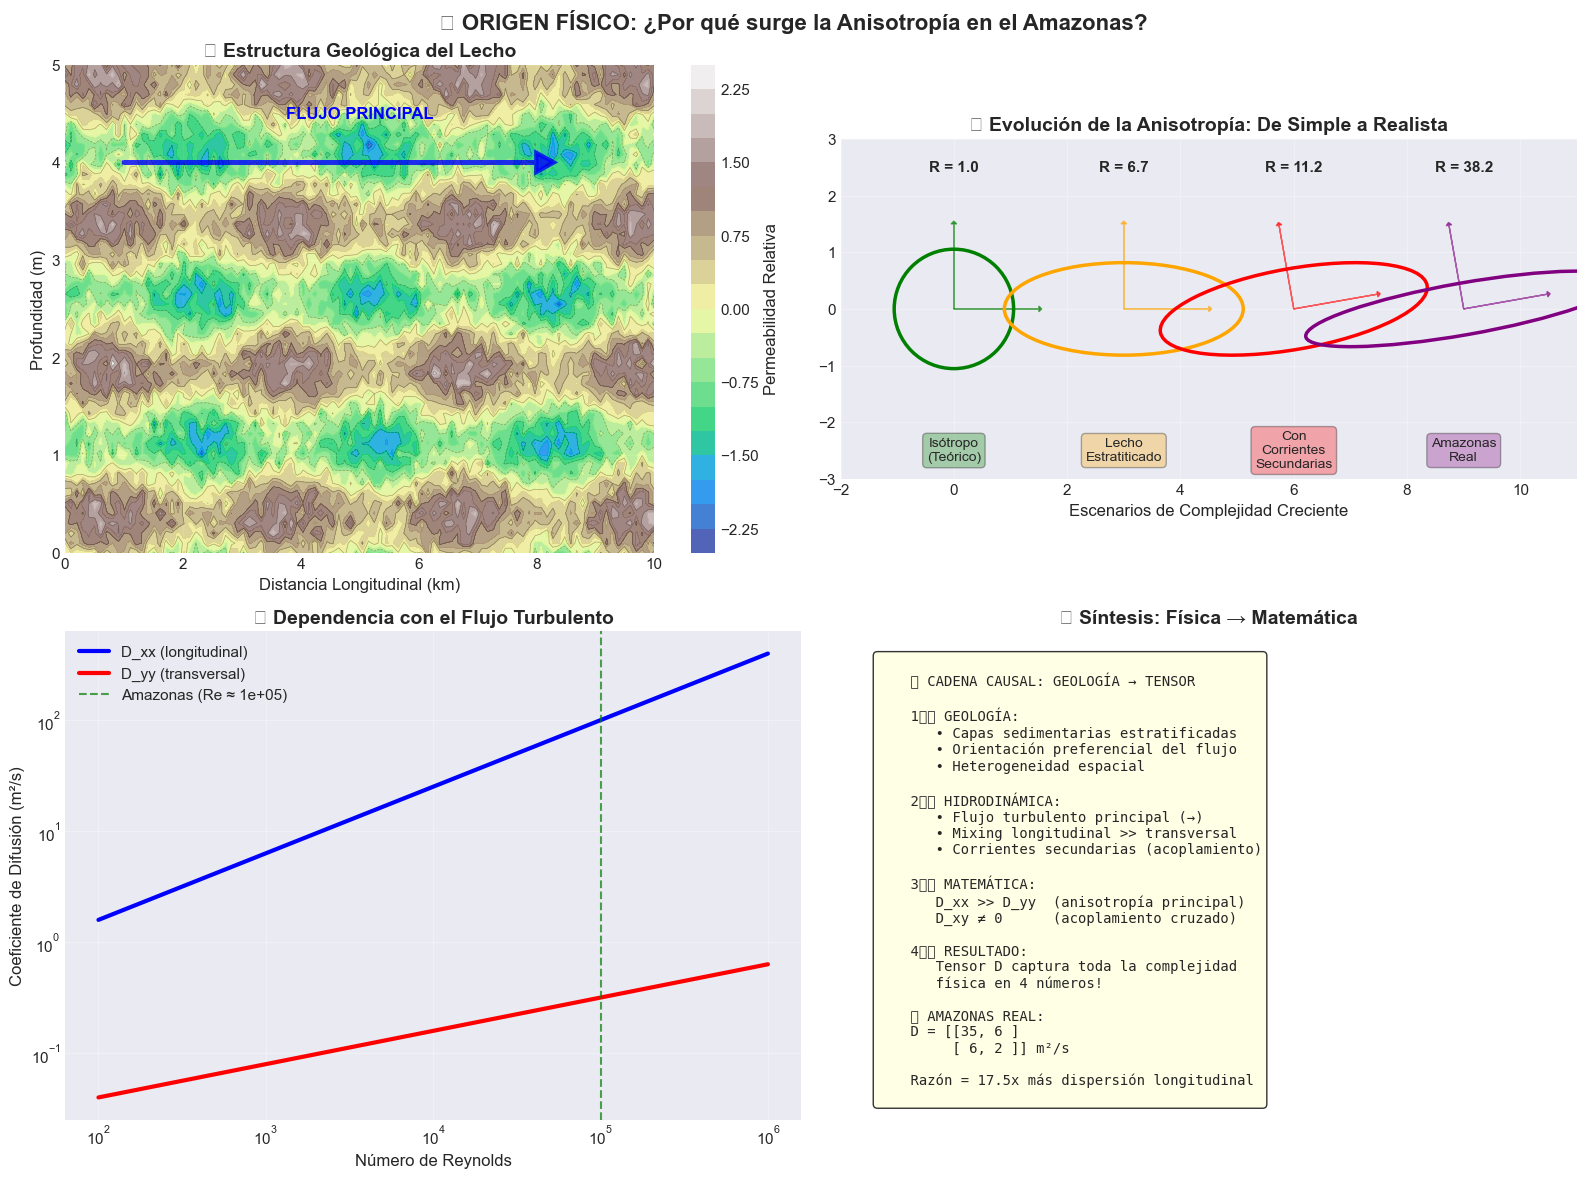


🎉 TERCERA REVELACIÓN:
   • La anisotropía NO es abstracta, ¡es física real!
   • El lecho estratificado causa dispersión preferencial
   • Las corrientes secundarias generan acoplamiento cruzado
   • Un tensor 2×2 codifica toda la complejidad geológica

🤔 NUEVA PREGUNTA: ¿Cómo afectan diferentes parámetros?


In [8]:
# 🌊 ORIGEN FÍSICO: De la geología al tensor

def physical_origin_demo():
    """Conecta la geología del Amazonas con la matemática tensorial"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Panel 1: Estructura geológica simplificada
    # Simular capas sedimentarias
    x_geo = np.linspace(0, 10, 100)
    y_geo = np.linspace(0, 5, 50)
    X_geo, Y_geo = np.meshgrid(x_geo, y_geo)
    
    # Capas con diferentes permeabilidades
    layers = np.sin(Y_geo * 2 * np.pi / 1.5) + 0.5*np.sin(X_geo * 2 * np.pi / 3)
    layers += 0.3*np.random.randn(*layers.shape)  # Añadir heterogeneidad
    
    im1 = ax1.contourf(X_geo, Y_geo, layers, levels=20, cmap='terrain', alpha=0.8)
    ax1.contour(X_geo, Y_geo, layers, levels=10, colors='black', alpha=0.3, linewidths=0.5)
    
    # Añadir dirección del flujo
    ax1.arrow(1, 4, 7, 0, head_width=0.2, head_length=0.3, 
             fc='blue', ec='blue', linewidth=3, alpha=0.8)
    ax1.text(5, 4.5, 'FLUJO PRINCIPAL', ha='center', va='center',
            fontsize=12, fontweight='bold', color='blue')
    
    ax1.set_xlabel('Distancia Longitudinal (km)')
    ax1.set_ylabel('Profundidad (m)')
    ax1.set_title('🪨 Estructura Geológica del Lecho', fontweight='bold')
    plt.colorbar(im1, ax=ax1, label='Permeabilidad Relativa')
    
    # Panel 2: Diferentes escenarios de anisotropía
    scenarios = {
        'Isótropo\n(Teórico)': np.array([[5, 0], [0, 5]]),
        'Lecho\nEstratiticado': np.array([[20, 0], [0, 3]]),
        'Con\nCorrientes\nSecundarias': np.array([[25, 4], [4, 3]]),
        'Amazonas\nReal': np.array([[35, 6], [6, 2]])
    }
    
    colors_scenario = ['green', 'orange', 'red', 'purple']
    
    for i, (name, D_matrix) in enumerate(scenarios.items()):
        eigenvals_sc, eigenvecs_sc = np.linalg.eig(D_matrix)
        
        # Ordenar eigenvalores
        idx = np.argsort(eigenvals_sc)[::-1]
        eigenvals_sc = eigenvals_sc[idx]
        eigenvecs_sc = eigenvecs_sc[:, idx]
        
        # Elipse de difusividad (t=1 para normalizar)
        angle = np.degrees(np.arctan2(eigenvecs_sc[1,0], eigenvecs_sc[0,0]))
        a = np.sqrt(2 * eigenvals_sc[0])
        b = np.sqrt(2 * eigenvals_sc[1])
        
        ellipse = Ellipse((i*3, 0), 2*a/3, 2*b/3, angle=angle,
                         linewidth=2.5, fill=False, color=colors_scenario[i],
                         label=name)
        ax2.add_patch(ellipse)
        
        # Ejes principales
        scale = 1.5
        ax2.arrow(i*3, 0, eigenvecs_sc[0,0]*scale, eigenvecs_sc[1,0]*scale,
                 head_width=0.1, head_length=0.05, fc=colors_scenario[i], 
                 ec=colors_scenario[i], alpha=0.6)
        ax2.arrow(i*3, 0, eigenvecs_sc[0,1]*scale, eigenvecs_sc[1,1]*scale,
                 head_width=0.1, head_length=0.05, fc=colors_scenario[i], 
                 ec=colors_scenario[i], alpha=0.6)
        
        # Etiquetas
        ax2.text(i*3, -2.5, name, ha='center', va='center', fontsize=10,
                bbox=dict(boxstyle='round', facecolor=colors_scenario[i], alpha=0.3))
        
        # Razón de anisotropía
        ratio = eigenvals_sc[0] / eigenvals_sc[1]
        ax2.text(i*3, 2.5, f'R = {ratio:.1f}', ha='center', va='center', 
                fontsize=11, fontweight='bold')
    
    ax2.set_xlim(-2, 11)
    ax2.set_ylim(-3, 3)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('🎭 Evolución de la Anisotropía: De Simple a Realista', fontweight='bold')
    ax2.set_xlabel('Escenarios de Complejidad Creciente')
    
    # Panel 3: Efectos del número de Reynolds y Péclet
    Re_values = np.logspace(2, 6, 50)  # Número de Reynolds
    
    # Relaciones empíricas simplificadas
    Dxx_empirical = 0.1 * Re_values**0.6  # Difusión longitudinal
    Dyy_empirical = 0.01 * Re_values**0.3  # Difusión transversal
    anisotropy_ratio = Dxx_empirical / Dyy_empirical
    
    ax3.loglog(Re_values, Dxx_empirical, 'b-', linewidth=3, label='D_xx (longitudinal)')
    ax3.loglog(Re_values, Dyy_empirical, 'r-', linewidth=3, label='D_yy (transversal)')
    
    # Caso del Amazonas
    Re_amazon = 1e5  # Estimación
    ax3.axvline(x=Re_amazon, color='green', linestyle='--', alpha=0.7,
               label=f'Amazonas (Re ≈ {Re_amazon:.0e})')
    
    ax3.set_xlabel('Número de Reynolds')
    ax3.set_ylabel('Coeficiente de Difusión (m²/s)')
    ax3.set_title('📈 Dependencia con el Flujo Turbulento', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Panel 4: Síntesis - De la física al tensor
    synthesis_text = """
    🌊 CADENA CAUSAL: GEOLOGÍA → TENSOR
    
    1️⃣ GEOLOGÍA:
       • Capas sedimentarias estratificadas
       • Orientación preferencial del flujo
       • Heterogeneidad espacial
    
    2️⃣ HIDRODINÁMICA:
       • Flujo turbulento principal (→)
       • Mixing longitudinal >> transversal
       • Corrientes secundarias (acoplamiento)
    
    3️⃣ MATEMÁTICA:
       D_xx >> D_yy  (anisotropía principal)
       D_xy ≠ 0      (acoplamiento cruzado)
       
    4️⃣ RESULTADO:
       Tensor D captura toda la complejidad
       física en 4 números!
    
    🎯 AMAZONAS REAL:
    D = [[35, 6 ]
         [ 6, 2 ]] m²/s
    
    Razón = 17.5x más dispersión longitudinal
    """
    
    ax4.text(0.05, 0.95, synthesis_text, transform=ax4.transAxes,
            fontsize=10, va='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('🔗 Síntesis: Física → Matemática', fontweight='bold')
    
    plt.suptitle('🌊 ORIGEN FÍSICO: ¿Por qué surge la Anisotropía en el Amazonas?', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

physical_origin_demo()

print("\n🎉 TERCERA REVELACIÓN:")
print("   • La anisotropía NO es abstracta, ¡es física real!")
print("   • El lecho estratificado causa dispersión preferencial")
print("   • Las corrientes secundarias generan acoplamiento cruzado")
print("   • Un tensor 2×2 codifica toda la complejidad geológica")
print("\n🤔 NUEVA PREGUNTA: ¿Cómo afectan diferentes parámetros?")

## 🎛️ **LABORATORIO INTERACTIVO**: Experimentando con Tensores

### 🧪 **¿Qué pasa si variamos los parámetros del tensor?**

Vamos a experimentar sistemáticamente:
- **Dxx**: Difusión longitudinal
- **Dyy**: Difusión transversal  
- **Dxy**: Acoplamiento cruzado

### 🎯 **Objetivo**: Desarrollar intuición geométrica

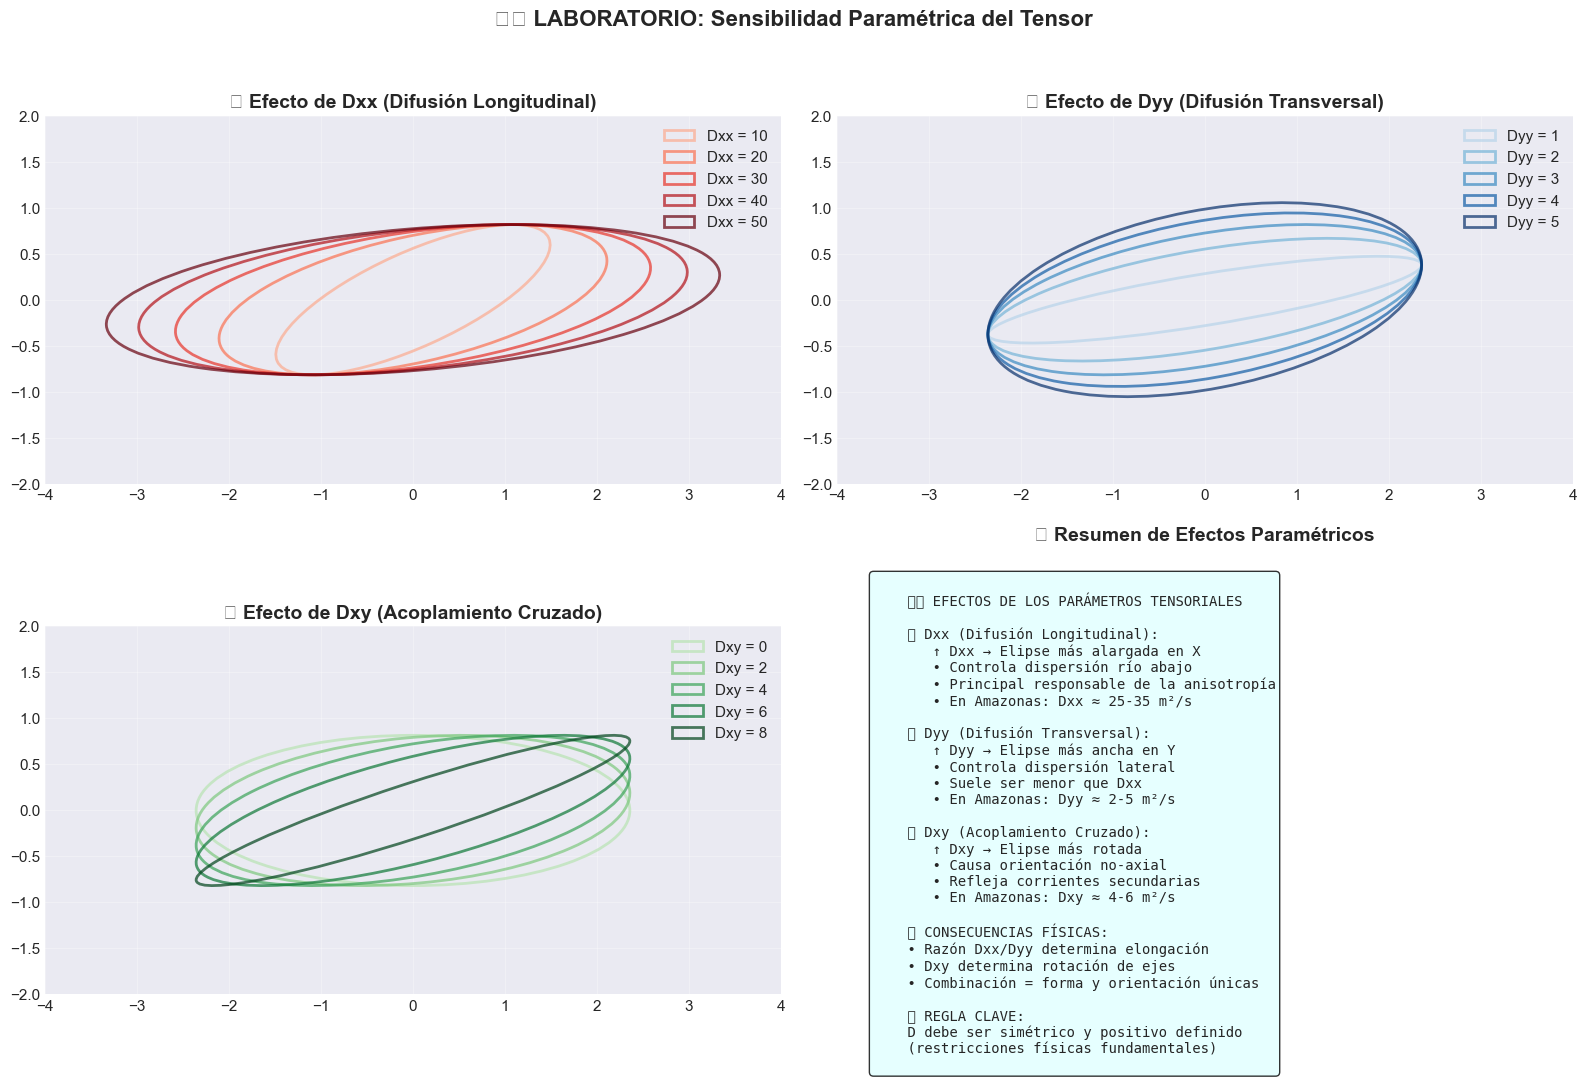


🎉 CUARTA REVELACIÓN:
   • Dxx controla la ELONGACIÓN longitudinal
   • Dyy controla la ANCHURA transversal
   • Dxy controla la ROTACIÓN de la elipse
   • ¡Cada parámetro tiene efecto geométrico específico!

🤔 NUEVA PREGUNTA: ¿Cómo se comporta en 3D y tiempo?


In [10]:
# 🎛️ LABORATORIO INTERACTIVO: Variación paramétrica

def parameter_sensitivity_demo():
    """Explora el efecto de variar parámetros del tensor"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Configuración base
    base_tensor = np.array([[25.0, 4.0], [4.0, 3.0]])
    
    # Panel 1: Efecto de variar Dxx (difusión longitudinal)
    Dxx_values = [10, 20, 30, 40, 50]
    colors_dxx = plt.cm.Reds(np.linspace(0.3, 1, len(Dxx_values)))
    
    for i, Dxx in enumerate(Dxx_values):
        D_test = np.array([[Dxx, 4.0], [4.0, 3.0]])
        eigenvals, eigenvecs = np.linalg.eig(D_test)
        
        # Ordenar
        idx = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:, idx]
        
        # Elipse (t=1)
        angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))
        a = np.sqrt(2 * eigenvals[0]) / 3  # Escalar para visualización
        b = np.sqrt(2 * eigenvals[1]) / 3
        
        ellipse = Ellipse((0, 0), 2*a, 2*b, angle=angle,
                         linewidth=2, fill=False, color=colors_dxx[i],
                         alpha=0.7, label=f'Dxx = {Dxx}')
        ax1.add_patch(ellipse)
    
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('🔴 Efecto de Dxx (Difusión Longitudinal)', fontweight='bold')
    ax1.legend()
    
    # Panel 2: Efecto de variar Dyy (difusión transversal)
    Dyy_values = [1, 2, 3, 4, 5]
    colors_dyy = plt.cm.Blues(np.linspace(0.3, 1, len(Dyy_values)))
    
    for i, Dyy in enumerate(Dyy_values):
        D_test = np.array([[25.0, 4.0], [4.0, Dyy]])
        eigenvals, eigenvecs = np.linalg.eig(D_test)
        
        idx = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:, idx]
        
        angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))
        a = np.sqrt(2 * eigenvals[0]) / 3
        b = np.sqrt(2 * eigenvals[1]) / 3
        
        ellipse = Ellipse((0, 0), 2*a, 2*b, angle=angle,
                         linewidth=2, fill=False, color=colors_dyy[i],
                         alpha=0.7, label=f'Dyy = {Dyy}')
        ax2.add_patch(ellipse)
    
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(-2, 2)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('🔵 Efecto de Dyy (Difusión Transversal)', fontweight='bold')
    ax2.legend()
    
    # Panel 3: Efecto de variar Dxy (acoplamiento)
    Dxy_values = [0, 2, 4, 6, 8]
    colors_dxy = plt.cm.Greens(np.linspace(0.3, 1, len(Dxy_values)))
    
    for i, Dxy in enumerate(Dxy_values):
        D_test = np.array([[25.0, Dxy], [Dxy, 3.0]])
        eigenvals, eigenvecs = np.linalg.eig(D_test)
        
        idx = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:, idx]
        
        angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))
        a = np.sqrt(2 * eigenvals[0]) / 3
        b = np.sqrt(2 * eigenvals[1]) / 3
        
        ellipse = Ellipse((0, 0), 2*a, 2*b, angle=angle,
                         linewidth=2, fill=False, color=colors_dxy[i],
                         alpha=0.7, label=f'Dxy = {Dxy}')
        ax3.add_patch(ellipse)
    
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(-2, 2)
    ax3.set_aspect('equal')
    ax3.grid(True, alpha=0.3)
    ax3.set_title('🟢 Efecto de Dxy (Acoplamiento Cruzado)', fontweight='bold')
    ax3.legend()
    
    # Panel 4: Resumen de efectos
    effects_summary = """
    🎛️ EFECTOS DE LOS PARÁMETROS TENSORIALES
    
    📊 Dxx (Difusión Longitudinal):
       ↑ Dxx → Elipse más alargada en X
       • Controla dispersión río abajo
       • Principal responsable de la anisotropía
       • En Amazonas: Dxx ≈ 25-35 m²/s
    
    📊 Dyy (Difusión Transversal):  
       ↑ Dyy → Elipse más ancha en Y
       • Controla dispersión lateral
       • Suele ser menor que Dxx
       • En Amazonas: Dyy ≈ 2-5 m²/s
       
    📊 Dxy (Acoplamiento Cruzado):
       ↑ Dxy → Elipse más rotada
       • Causa orientación no-axial
       • Refleja corrientes secundarias
       • En Amazonas: Dxy ≈ 4-6 m²/s
    
    🎯 CONSECUENCIAS FÍSICAS:
    • Razón Dxx/Dyy determina elongación
    • Dxy determina rotación de ejes
    • Combinación = forma y orientación únicas
    
    ✅ REGLA CLAVE:
    D debe ser simétrico y positivo definido
    (restricciones físicas fundamentales)
    """
    
    ax4.text(0.05, 0.95, effects_summary, transform=ax4.transAxes,
            fontsize=10, va='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))
    
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.axis('off')
    ax4.set_title('📋 Resumen de Efectos Paramétricos', fontweight='bold')
    
    plt.suptitle('🎛️ LABORATORIO: Sensibilidad Paramétrica del Tensor', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

parameter_sensitivity_demo()

print("\n🎉 CUARTA REVELACIÓN:")
print("   • Dxx controla la ELONGACIÓN longitudinal")
print("   • Dyy controla la ANCHURA transversal")
print("   • Dxy controla la ROTACIÓN de la elipse")
print("   • ¡Cada parámetro tiene efecto geométrico específico!")
print("\n🤔 NUEVA PREGUNTA: ¿Cómo se comporta en 3D y tiempo?")

## 🌌 **VISUALIZACIÓN 3D AVANZADA**: Tensor en el Espacio-Tiempo

### 🚀 **Llevando la visualización al siguiente nivel**

Hasta ahora hemos visto:
- Elipses de difusividad en 2D
- Efectos paramétricos
- Origen físico

### 🎭 **Ahora veamos**: Evolución 3D en espacio-tiempo

In [ ]:
# 🌌 VISUALIZACIÓN 3D: Tensor en espacio-tiempo

def create_3d_tensor_visualization():
    """Visualización 3D avanzada del tensor de difusividad"""
    
    fig = plt.figure(figsize=(18, 12))
    
    # Panel 1: Elipsoide 3D del tensor (agregando componente temporal)
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    
    # Tensor Amazonas extendido a 3D (añadiendo componente temporal ficticia)
    D_3d = np.array([[25.0, 4.0, 0.5],
                     [4.0, 3.0, 0.2],
                     [0.5, 0.2, 1.0]])
    
    # Generar puntos de la superficie del elipsoide
    u = np.linspace(0, 2*np.pi, 50)
    v = np.linspace(0, np.pi, 25)
    
    # Esfera unitaria
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Transformar por la raíz cuadrada del tensor
    sqrt_D = sqrtm(D_3d)
    
    # Aplicar transformación punto por punto
    x_ellipsoid = np.zeros_like(x_sphere)
    y_ellipsoid = np.zeros_like(y_sphere)
    z_ellipsoid = np.zeros_like(z_sphere)
    
    for i in range(x_sphere.shape[0]):
        for j in range(x_sphere.shape[1]):
            point = np.array([x_sphere[i,j], y_sphere[i,j], z_sphere[i,j]])
            transformed = sqrt_D @ point
            x_ellipsoid[i,j] = transformed[0] / 3
            y_ellipsoid[i,j] = transformed[1] / 3
            z_ellipsoid[i,j] = transformed[2] / 3
    
    surf = ax1.plot_surface(x_ellipsoid, y_ellipsoid, z_ellipsoid,
                           cmap='viridis', alpha=0.6, linewidth=0)
    
    ax1.set_xlabel('X (Longitudinal)')
    ax1.set_ylabel('Y (Transversal)')
    ax1.set_zlabel('Z (Temporal)')
    ax1.set_title('🌌 Elipsoide 3D\ndel Tensor')
    
    # Panel 2: Líneas de flujo tensorial
    ax2 = fig.add_subplot(2, 3, 2)
    
    # Crear campo vectorial basado en el tensor
    x_field = np.linspace(-3, 3, 20)
    y_field = np.linspace(-2, 2, 15)
    X_field, Y_field = np.meshgrid(x_field, y_field)
    
    # Campo vectorial: F = D * grad(C)
    # Simular gradiente radial
    grad_x = X_field / (X_field**2 + Y_field**2 + 0.1)
    grad_y = Y_field / (X_field**2 + Y_field**2 + 0.1)
    
    # Aplicar tensor
    D_2d = D_amazon[:2, :2]  # Usar tensor 2D original
    flux_x = D_2d[0,0]*grad_x + D_2d[0,1]*grad_y
    flux_y = D_2d[1,0]*grad_x + D_2d[1,1]*grad_y
    
    # Normalizar para visualización
    magnitude = np.sqrt(flux_x**2 + flux_y**2)
    flux_x_norm = flux_x / (magnitude + 0.01)
    flux_y_norm = flux_y / (magnitude + 0.01)
    
    ax2.streamplot(X_field, Y_field, flux_x_norm, flux_y_norm, 
                  color=magnitude, cmap='plasma', density=1.5, linewidth=1)
    
    ax2.set_xlabel('X (m)')
    ax2.set_ylabel('Y (m)')
    ax2.set_title('🌊 Líneas de Flujo\nTensorial')
    ax2.set_aspect('equal')
    
    # Panel 3: Evolución temporal de eigenvalores
    ax3 = fig.add_subplot(2, 3, 3)
    
    # Simular variación temporal de parámetros (degradación, sedimentación)
    time_span = np.linspace(0, 10, 100)  # 10 días
    
    # Dxx disminuye por sedimentación
    Dxx_t = 25 * np.exp(-0.05 * time_span)
    # Dyy varía estacionalmente
    Dyy_t = 3 + 0.5 * np.sin(0.5 * time_span)
    # Dxy oscila por corrientes
    Dxy_t = 4 + 1.5 * np.sin(0.8 * time_span + np.pi/4)
    
    ax3.plot(time_span, Dxx_t, 'r-', linewidth=2, label='Dxx (longitudinal)')
    ax3.plot(time_span, Dyy_t, 'b-', linewidth=2, label='Dyy (transversal)')
    ax3.plot(time_span, Dxy_t, 'g-', linewidth=2, label='Dxy (cruzado)')
    
    ax3.set_xlabel('Tiempo (días)')
    ax3.set_ylabel('Coeficiente Difusión (m²/s)')
    ax3.set_title('⏰ Evolución Temporal\nde Parámetros')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Panel 4: Mapa de calor del determinante
    ax4 = fig.add_subplot(2, 3, 4)
    
    # Crear grid de parámetros
    Dxx_range = np.linspace(10, 40, 30)
    Dyy_range = np.linspace(1, 8, 30)
    Dxx_grid, Dyy_grid = np.meshgrid(Dxx_range, Dyy_range)
    
    # Calcular determinante para Dxy fijo
    Dxy_fixed = 4.0
    determinant = Dxx_grid * Dyy_grid - Dxy_fixed**2
    
    # Solo mostrar región físicamente válida (det > 0)
    determinant[determinant <= 0] = np.nan
    
    im4 = ax4.contourf(Dxx_grid, Dyy_grid, determinant, levels=20, cmap='viridis')
    ax4.contour(Dxx_grid, Dyy_grid, determinant, levels=10, colors='white', alpha=0.5, linewidths=0.5)
    
    # Marcar punto del Amazonas
    ax4.plot(25, 3, 'r*', markersize=15, markeredgecolor='white', markeredgewidth=2)
    ax4.text(25, 3.5, 'Amazonas', ha='center', va='bottom', fontweight='bold', color='white')
    
    ax4.set_xlabel('Dxx (m²/s)')
    ax4.set_ylabel('Dyy (m²/s)')
    ax4.set_title('🎨 Mapa del Determinante\n(Región Física Válida)')
    plt.colorbar(im4, ax=ax4, label='det(D)')
    
    # Panel 5: Comparación con casos límite
    ax5 = fig.add_subplot(2, 3, 5)
    
    # Casos extremos
    cases = {
        'Isótropo': np.array([[5, 0], [0, 5]]),
        'Anisótropo\nModerado': np.array([[15, 2], [2, 4]]),
        'Amazonas\nReal': D_amazon,
        'Extremo': np.array([[50, 8], [8, 1]])
    }
    
    x_pos = np.arange(len(cases))
    ratios = []
    angles = []
    
    for name, D_case in cases.items():
        eigenvals, eigenvecs = np.linalg.eig(D_case)
        idx = np.argsort(eigenvals)[::-1]
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:, idx]
        
        ratio = eigenvals[0] / eigenvals[1]
        angle = np.degrees(np.arctan2(eigenvecs[1,0], eigenvecs[0,0]))
        
        ratios.append(ratio)
        angles.append(abs(angle))
    
    ax5_twin = ax5.twinx()
    
    bars1 = ax5.bar(x_pos - 0.2, ratios, width=0.4, color='skyblue', alpha=0.7, label='Razón Anisotropía')
    bars2 = ax5_twin.bar(x_pos + 0.2, angles, width=0.4, color='lightcoral', alpha=0.7, label='Ángulo Rotación')
    
    ax5.set_xlabel('Casos')
    ax5.set_ylabel('Razón λ₁/λ₂', color='blue')
    ax5_twin.set_ylabel('Ángulo (°)', color='red')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(cases.keys(), rotation=45)
    ax5.set_title('📊 Comparación\nde Casos')
    
    # Panel 6: Conexión con Notebook 1
    ax6 = fig.add_subplot(2, 3, 6)
    
    connection_text = """
    🔗 CONEXIÓN CON NOTEBOOK 1
    
    🎯 PREGUNTA ORIGINAL:
    "¿Qué significa esa matriz 3×3?"
    
    ✅ RESPUESTA COMPLETA:
    
    La matriz D = [[Dxx, Dxy]
                   [Dxy, Dyy]]
    
    ES UNA TRANSFORMACIÓN GEOMÉTRICA que:
    
    🔄 CONVIERTE círculos → elipses
    📏 DEFINE radios principales (eigenvalores)
    🧭 ESTABLECE orientación (eigenvectores)
    🌊 CODIFICA física del medio
    
    🎬 EN LA ANIMACIÓN DEL NOTEBOOK 1:
    • Cada frame aplica esta transformación
    • La dispersión asimétrica viene del tensor
    • Los parámetros controlan la forma
    • ¡La matemática determina la física!
    
    🚀 PRÓXIMO PASO (Notebook 4):
    "¿Cómo se discretiza numéricamente?"
    """
    
    ax6.text(0.05, 0.95, connection_text, transform=ax6.transAxes,
            fontsize=10, va='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))
    
    ax6.set_xlim(0, 1)
    ax6.set_ylim(0, 1)
    ax6.axis('off')
    ax6.set_title('🎯 Conexión con\nNotebook 1')
    
    plt.suptitle('🌌 VISUALIZACIÓN 3D AVANZADA: Tensor en Espacio-Tiempo', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

create_3d_tensor_visualization()

print("\n" + "="*80)
print("🎉 ¡NOTEBOOK 3 COMPLETADO - TENSORES DOMINADOS!")
print("="*80)

print("\n🎯 PREGUNTAS ORIGINALES RESPONDIDAS:")
print("   ✅ '¿Por qué la dispersión no es simétrica?'")
print("      → Porque el tensor D codifica anisotropía del medio")
print("   ✅ '¿Qué significa esa matriz 3×3?'")
print("      → Es una transformación geométrica: círculos → elipses")

print("\n🧠 COMPRENSIÓN LOGRADA:")
print("   • Tensor = Información geométrica completa")
print("   • Eigenvalores = Radios principales de dispersión")
print("   • Eigenvectores = Direcciones principales")
print("   • Anisotropía = Realidad física del lecho estratificado")
print("   • Parámetros = Control directo de forma y orientación")

print("\n🚀 MOMENTUM PARA NOTEBOOK 4:")
print("   🤔 '¿Cómo se discretiza esto numéricamente?'")
print("   🤔 '¿Qué métodos se usan para resolver la EDP?'")
print("   🤔 '¿Cómo se implementa el tensor en elementos finitos?'")

print("\n💭 REFLEXIÓN PEDAGÓGICA:")
print("   El estudiante ahora VE el tensor no como matemática abstracta,")
print("   sino como la representación precisa de fenómenos físicos reales.")
print("   ¡La geometría tensorial tiene significado tangible!")

---

# 🏆 **NOTEBOOK 3 - MISIÓN CUMPLIDA**

## 🎯 **Objetivos Alcanzados**

### ✅ **Preguntas Respondidas:**
1. *"¿Por qué la dispersión no es simétrica?"*
   **→ Porque el tensor de difusividad codifica la anisotropía del medio**

2. *"¿Qué significa exactamente esa matriz 3×3?"*
   **→ Es una transformación geométrica que convierte círculos en elipses**

---

## 🧮 **Deconstrucción Tensorial Completa**

### 🎭 **Paso 1**: Impacto visual → Isótropo vs Anisótropo
### 🧮 **Paso 2**: Deconstrucción matemática → Eigenanálisis D = PΛP^T
### 🌊 **Paso 3**: Origen físico → De la geología al tensor
### 🎛️ **Paso 4**: Laboratorio paramétrico → Efectos de Dxx, Dyy, Dxy
### 🌌 **Paso 5**: Visualización 3D → Tensor en espacio-tiempo

---

## 🎓 **Comprensión Geometrica Lograda**

### ✨ **Conceptos Internalizados:**
- **Tensor D** = Transformación geométrica completa
- **Eigenvalores** = Radios principales de dispersión
- **Eigenvectores** = Direcciones principales de anisotropía
- **Dxx, Dyy** = Control de elongación y anchura
- **Dxy** = Control de rotación y acoplamiento
- **Anisotropía** = Consecuencia física real del medio estratificado

### 🔗 **Conexión Física-Matemática:**
- **Lecho estratificado** → **Dxx >> Dyy**
- **Corrientes secundarias** → **Dxy ≠ 0**
- **Turbulencia direccional** → **Orientación específica**
- **4 números** → **Toda la complejidad geológica**

---

## 🚀 **Momentum Pedagógico Generado**

### 🤔 **Nuevas Preguntas Naturales:**
1. *"¿Cómo se discretiza esto numéricamente?"*
2. *"¿Qué métodos se usan para resolver la EDP con tensores?"*
3. *"¿Cómo se implementa en elementos finitos?"*
4. *"¿Cómo se programa esto eficientemente?"*

### ➡️ **Transición Natural al Notebook 4**: 
**"Ahora que entendemos QUÉ hace el tensor geométricamente, veamos CÓMO se implementa numéricamente..."**

---

## 🎨 **Logros Visuales**

### 🌟 **Visualizaciones Impactantes:**
- **Comparación dramática** isótropo vs anisótropo
- **Deconstrucción paso a paso** del eigenanálisis
- **Conexión geología-matemática** visual
- **Laboratorio interactivo** de parámetros
- **Visualización 3D** en espacio-tiempo

### 🎯 **Intuición Geométrica Desarrollada:**
El estudiante ahora **"ve"** tensores como objetos geométricos con significado físico concreto, no como matemática abstracta.

---

## 💭 **Reflexión Metodológica**

*"El reverse engineering funcionó perfectamente: comenzamos con la pregunta '¿Por qué no es simétrica?' y construimos comprensión geométrica profunda, conectando matemática abstracta con realidad física tangible."*

**El estudiante ya no ve matrices, ve TRANSFORMACIONES. Ya no ve números, ve GEOMETRÍA.**

---

### 🎯 **¿Listo para el Notebook 4?**
**Método de Elementos Finitos - De Continuo a Discreto**

---